In [2]:
# 데이터 전처리
## Scaling
## Sampling
## Dimensionality Reduciton(차원의 축소)
## Categorical Variable to Numeric Variable


# 먼저 머신러닝의 대표적인 데이터 셋 중 하나인 전복 데이터를 불러오겠습니다.
# 전복 데이터셋은 수컷, 암컷, 유아기 3개의 범주로 이루어진 범주형 변수와 길이, 직경, 높이, 무게 등 여러 수치형 변수로 이루어져 있습니다.
# 데이터를 불러온 후 입력으로 사용할 변수들과 레이블로 사용할 성별 변수로 나누겠습니다.

# abalone.txt 파일 불러오기
# M/F/I -> label


In [2]:
import numpy as np  # 수학연산을 위한 numpy
import pandas as pd # data 정리를 위한 pandas
import sklearn  #data 전처리를 위한 scikit-learn
import matplotlib.pyplot as plt # data 시각화를 위한 plot

import os
from os.path import join    # 파일로드를 위한 os.path
import warnings # 쓸때없는 경고 없애기
warnings.filterwarnings('ignore')   #자잘한 경고들은 무시하겠다.

In [3]:

abalone_path = join('../02_DataSet/abalone.txt')   # 데이터 로드
column_path = join('../02_DataSet/abalone_attributes.txt')  # 데이터 칼럼 로드

abalone_columns = list()
# column name을 list 객체로 만들기
for l in open(column_path):  # abalone_attributes 열기:
    abalone_columns.append(l.strip()) # list 객체에 하나씩 순서대로 추가
print(abalone_columns)

# ['Sex\n', 'Length\n', 'Diameter\n', 'Height\n', 'Whole weight\n', 'Shucked weight\n', 'Viscera weight\n', 'Shell weight\n', 'Rings'] 이런 식으로 list가 나오기 때문에,
# \n 같은 것은 strip()으로 정리하기!
# strip : 깔끔한 데이터 정리에 필수!

# Pandas를 이용해서 abalone 데이터를 읽어온다.
data = pd.read_csv(abalone_path, header=None, names=abalone_columns)
# names 속성은 csv를 불러 올때만 사용할 수 있는 속성이다!
# ;로 되어 있는 csv data를 읽을 수 있음 / abalone_path에 경로를 지정했기 때문에 경로지정!
# data 안에 column header 있을경우 알려야하지만, 없을 경우 없다고 해야한다. header=None
# column에 대한 list 객체를 pandas의 data frame의 list로 불러올 수 있음 names=abalone_columns
data

['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [13]:
# head( ) ,

In [14]:
data.head()
#  Sex는 Label Data
# 나머지는 Features
# Data를 제대로 쓰기 위해 Label Data을 없애야 할 필요가 있다.

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [15]:
data.shape

(4177, 9)

In [16]:
label = data['Sex'] # sex data는 우리가 label 로 정해두겠다.
del data['Sex'] # Data 성별 삭제
data.head() #성별 data가 없어졌다!

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [17]:
data.describe() #단위에 따른 data를 가져올 수 있다.

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [18]:
data.info

<bound method DataFrame.info of       Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0      0.455     0.365   0.095        0.5140          0.2245          0.1010   
1      0.350     0.265   0.090        0.2255          0.0995          0.0485   
2      0.530     0.420   0.135        0.6770          0.2565          0.1415   
3      0.440     0.365   0.125        0.5160          0.2155          0.1140   
4      0.330     0.255   0.080        0.2050          0.0895          0.0395   
...      ...       ...     ...           ...             ...             ...   
4172   0.565     0.450   0.165        0.8870          0.3700          0.2390   
4173   0.590     0.440   0.135        0.9660          0.4390          0.2145   
4174   0.600     0.475   0.205        1.1760          0.5255          0.2875   
4175   0.625     0.485   0.150        1.0945          0.5310          0.2610   
4176   0.710     0.555   0.195        1.9485          0.9455          0.3765   

      S

In [19]:
## Scaling
# min-max scaling  : 수치의 평준화를 위해서 여러 수치들의 표준을 0-100로 표준화함.

data2 = (data - np.min(data)) / (np.max(data)-np.min(data)) 
# 실제로 이렇게 쓰는건 권장하지 않음
# 공식 함수 libaray를 쓰는걸 항상 추천..

data2
# 최소값과 최대값을 스케일링을 통해서 맞출 수 있음.

# 원본 data에 경우 rings 개수가 너무 크다.. -> 0.5, 0.2 등등으로 변경됨!

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.513514,0.521008,0.084071,0.181335,0.150303,0.132324,0.147982,0.500000
1,0.371622,0.352941,0.079646,0.079157,0.066241,0.063199,0.068261,0.214286
2,0.614865,0.613445,0.119469,0.239065,0.171822,0.185648,0.207773,0.285714
3,0.493243,0.521008,0.110619,0.182044,0.144250,0.149440,0.152965,0.321429
4,0.344595,0.336134,0.070796,0.071897,0.059516,0.051350,0.053313,0.214286
...,...,...,...,...,...,...,...,...
4172,0.662162,0.663866,0.146018,0.313441,0.248151,0.314022,0.246637,0.357143
4173,0.695946,0.647059,0.119469,0.341420,0.294553,0.281764,0.258097,0.321429
4174,0.709459,0.705882,0.181416,0.415796,0.352724,0.377880,0.305431,0.285714
4175,0.743243,0.722689,0.132743,0.386931,0.356422,0.342989,0.293473,0.321429


In [20]:
#  1 ) 데이터 전처리 모듈의 불러오기 및 정의하기
from sklearn.preprocessing import MinMaxScaler  # min-max 스케일링을 해주는 method

mMscaler = MinMaxScaler()   # instance 변수 만들어주기
mMscaler.fit(data)  # mMscaler에 data 입혀보기
data3 = mMscaler.transform(data)    # data를 넣고 tranform 하는 순간 min-max scaling을 하게 됨!
data3   # tranform 하게 되면 numpy 배열로 변경됨. pandas 배열이 아님!

array([[0.51351351, 0.5210084 , 0.0840708 , ..., 0.1323239 , 0.14798206,
        0.5       ],
       [0.37162162, 0.35294118, 0.07964602, ..., 0.06319947, 0.06826109,
        0.21428571],
       [0.61486486, 0.61344538, 0.11946903, ..., 0.18564845, 0.2077728 ,
        0.28571429],
       ...,
       [0.70945946, 0.70588235, 0.18141593, ..., 0.37788018, 0.30543099,
        0.28571429],
       [0.74324324, 0.72268908, 0.13274336, ..., 0.34298881, 0.29347285,
        0.32142857],
       [0.85810811, 0.84033613, 0.17256637, ..., 0.49506254, 0.49177877,
        0.39285714]])

In [21]:
mMscaler = MinMaxScaler()
data4 = mMscaler.fit_transform(data)  # fit -> tranform을 한꺼번에 할 수 있음! 이걸 가장많이 사용함!
# 하지만 아직도 numpy 배열이다.

In [22]:
mMscaled_data = pd.DataFrame(data4, columns=data.columns)    # data의 원본 column을 가져와야함.. sex 항목을 지워서 data4와 개수가 안맞아서 error!
mMscaled_data.head()    # 드디어 min-max scaler 불러옴!

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.513514,0.521008,0.084071,0.181335,0.150303,0.132324,0.147982,0.500000
1,0.371622,0.352941,0.079646,0.079157,0.066241,0.063199,0.068261,0.214286
2,0.614865,0.613445,0.119469,0.239065,0.171822,0.185648,0.207773,0.285714
3,0.493243,0.521008,0.110619,0.182044,0.144250,0.149440,0.152965,0.321429
4,0.344595,0.336134,0.070796,0.071897,0.059516,0.051350,0.053313,0.214286


In [23]:
# 2 ) Standard Scaling
# +1/-1에서 모든 값을 맞춰줌 / 평균은 0
# 표준 scaler는 데이터의 분산도를 보기 위해서사용!
# 경우에 따라서는 min-max / standard scaler를 사용함

from sklearn.preprocessing import StandardScaler

sdscaler = StandardScaler()
sdscaled_data = sdscaler.fit_transform(data)

sdscaled_data = pd.DataFrame(sdscaled_data,columns=data.columns)
sdscaled_data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,1.571544
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,-0.910013
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,-0.289624
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,0.020571
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,-0.910013


In [24]:
#3 ) Sampling
# 적은 클래스의 데이터 수를 증가 시키는 Oversampling -> 큰 데이터를 작게 줄임
# 많은 클래스의 데이터 수를 감소 시키는 Undersampling -> 작은 데이터를 크게 늘림

# 1. Random Over, Under Sampling

from imblearn.over_sampling import  RandomOverSampler
from imblearn.under_sampling import  RandomUnderSampler

ros = RandomOverSampler()
rus = RandomUnderSampler()

In [25]:
#  Over Sampling

oversampled_data, oversampled_label = ros.fit_resample(data,label)  # oversample한 data와 label을  fit해줌
oversampled_data =pd.DataFrame(oversampled_data, columns=data.columns)
# 위에서 label data를 먼저 확보를 해놓고 시작해야함.

# Under Sampling

undersampled_data, undersampled_label = rus.fit_resample(data,label)
undersampled_data = pd.DataFrame(undersampled_data,columns=data.columns)


In [26]:
# 원본 데이터의 불균형

print('원본 데이터의 클래스 비율\n{0}'.format(pd.get_dummies(label).sum()))
# get_dummies : label data를 더미로 떠서 sum 해서 보여줘라.
# Label 데이터 숫자의 불균형이 생김 -> M이 가장 숫자가 커서 영향력이 큼.
# F/I/M의 비율을 맞춰줘야함!

# Over Sampling 된 데이터 확인

print('\nRandom Over 샘플링 결과 \n{0}'.format(pd.get_dummies(oversampled_label).sum()))
# Over Sampling 된 label의 데이터를 확인
# F/I/M의 data양을 모두 1528로 통일해줌!

# Under Sampling 된 데이터 확인

print('\nRandom Under 샘플링 결과\n{0}'.format(pd.get_dummies(undersampled_label).sum()))
# Under Sampling 된 label의 데이터를 확인
# F/I/M의 data양을 모두 1307로 통일해줌!

#  Over sampling의 문제는 적은 data를 복제해오기 때문에, 특정한 요소들이 반복적으로 들어가는 문제가 생김 
# 특정 data의 편향이 생길 수 있음.

원본 데이터의 클래스 비율
F    1307
I    1342
M    1528
dtype: int64

Random Over 샘플링 결과 
F    1528
I    1528
M    1528
dtype: int64

Random Under 샘플링 결과
F    1307
I    1307
M    1307
dtype: int64


In [27]:
#   make_classfication

#   sample : 표본 데이터의 수
#   features : 독립 변수의 수
#   redundant : 
#   classes : 클래스의 개수
#   weight : class의 비중
#   random_state : random seed

In [28]:
from sklearn.datasets import make_classification    # 분류문제를 풀 수 있는 객체를 만듬
data, label = make_classification(n_samples=1000,n_features=2,n_informative=2,n_redundant=0,n_repeated=0,n_classes=3,n_clusters_per_class=1,weights=[0.05,0.15,0.8],class_sep=0.8,random_state=2019) 
# data를 조정하기 쉽도록 하기 위한 객체.
#    n_samples=1000 : 1000개 짜리 sample을 생성한 data가 생김.
#    n_feature=2 : 2차원 그래프로 만들기 -> x,y 값이 필요
#   추가적인  feature에 대한 옵션을 적용해야함!

#   make_classification을 이용해서 sample을 만들일은 거의 없다!

data # Numpy 배열이다.

array([[-0.38148542, -0.25661671],
       [-0.4083119 ,  0.09191871],
       [ 0.68144629, -0.67466142],
       ...,
       [ 0.36566061, -0.52399384],
       [-1.78159071,  1.92432382],
       [ 0.73685928, -0.85311514]])

In [29]:
label   # 아무 옵션을 안주면  0 or 1이 나온다.
#  class는 3개 0,1,2
#  비중치는 2를 높게했기 때문에 2가 많아보임!

array([1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 0, 1, 2,
       2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2,
       0, 0, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 0, 2, 1,
       1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       1, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2,

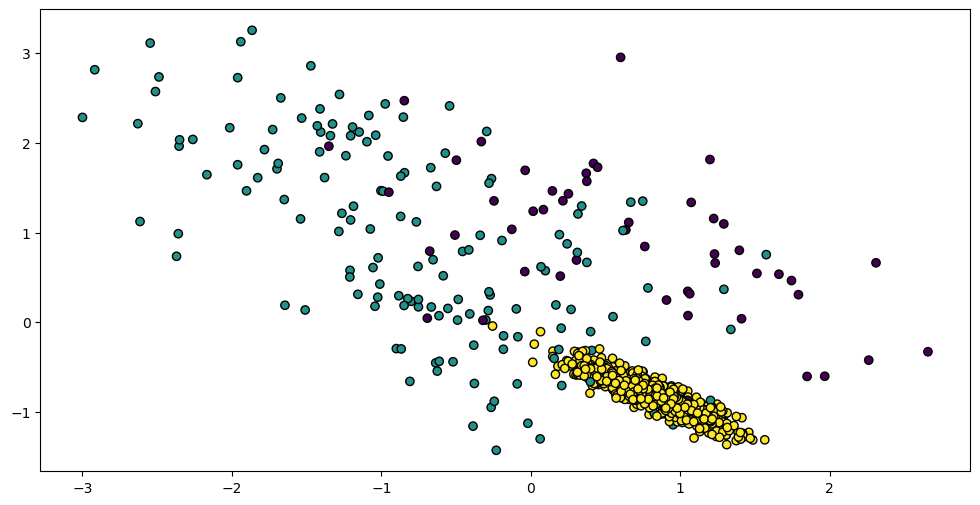

In [30]:
fig = plt.figure(figsize=(12,6))    #   그림판 사이즈 생성
plt.scatter(data[:,0],data[:,1],c=label, edgecolors='black')   #   데이터의 점을 찍는 작업 
#   feature가 2라서 x축 y축에 하나씩 들어가야함.
#   x = 0번 data 처음~끝 , y = 1번  data 처음~끝
#   c=label에 따라서 색을 다르게 함
#   edgecolors 점의 선을 검은색으로 지정

#   확실한건  보라색의 label이 가장 작음 (가중치 낮음)
#   만약 이 상태에서 Over Sampling을 한다면 너무 거리가 멀어보이는 점의 데이터가 복제될 수 있음.
#   거리가 먼 데이터의 오류를 줄이기 위해 이웃간의 거리를 평균을 잡은 점을 만들기! by SMOTE

In [31]:
# SMOTE

from imblearn.over_sampling import SMOTE
smote = SMOTE(k_neighbors=5)    #   일단 이웃의 개수(k)를 5개로 가정.
#   나중에 자동으로 k에 따라서 돌리면 훨씬 부드러운 data를 만들 수 있음

In [32]:
smoted_data, smoted_label = smote.fit_resample(data,label)  # Data를 k값에 따라 증식!

In [33]:
print('원본 데이터의 클래스 비율\n{0}'.format(pd.get_dummies(label).sum()))
print('SMOTE 데이터의 클래스 비율\n{0}'.format(pd.get_dummies(smoted_label).sum()))

#   원본에 비해서 SMOTE가 793개로 Over Sampling 됨!

원본 데이터의 클래스 비율
0     53
1    154
2    793
dtype: int64
SMOTE 데이터의 클래스 비율
0    793
1    793
2    793
dtype: int64


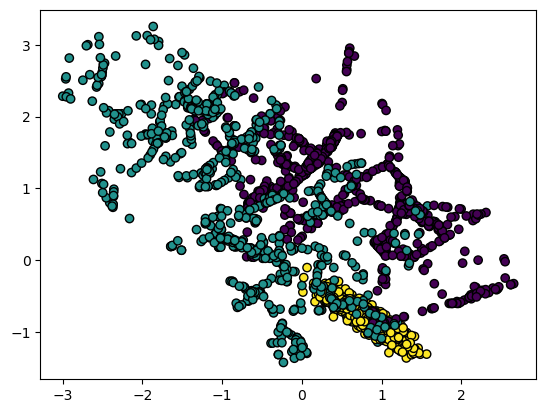

In [34]:
fig = plt.Figure(figsize=(12,6))
plt.scatter(smoted_data[:,0],smoted_data[:,1],c=smoted_label,linewidths=1,edgecolors='black')
#   특정 편향 데이터가 많아지는 걸 방지하기 위해서 빈자리를 채워나가는 데이터가 생김!